In [210]:
#importing libraries important for numerical operations and ploting graphs

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [211]:
market=pd.read_excel('Python_mandatory_project_supermarket_sales.xlsx') #reading xlsx file
market.head() # displaying top 5 results for the sheet.


,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [212]:
market.info() #checking detail(data type) of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [213]:
#changing String(object) data to categorical data for few columns
market['Gender']=market['Gender'].astype('category')
market['Branch']=market['Branch'].astype('category')
market['Payment']=market['Payment'].astype('category')
market['Time']=market['Time'].astype('str')
#market['Unit price']=market['Unit Price'].astype('float64')


In [214]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   category      
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   category      
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

1. Is your supermarket more popular with males or females? 
**bold text**

In [215]:
groupby_Gender=market.groupby('Gender') # grouping the data by gender to get the count of female and males coming to supermarket
groupby_Gender.size()


Gender
Female    501
Male      499
dtype: int64

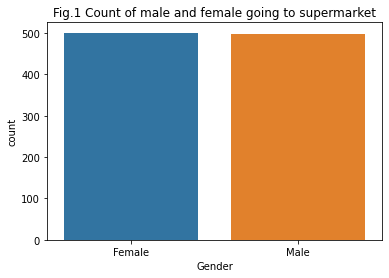

In [233]:
sns.countplot(x='Gender', data=market)
plt.title("Fig.1 Count of male and female going to supermarket")
plt.show()

Supermarket is more popular among women. 
We can see from the count of both that women are 501 and men are 499 who are coming to supermarket.
Same can be inferred from graph too where the Female bar is slightly higher in comparison.

2. What does the customer rating look like and can you also comment on its distribution? 



In [217]:
avg_rating=market.Rating.mean() #calculating average rating given to supermarket
avg_rating_by_gender=groupby_Gender.Rating.mean() #calculating the mean rating by males and females
print("Average customer rating: ",avg_rating)
print(avg_rating_by_gender[:])

Average customer rating:  6.966163141993957
Gender
Female    6.955311
Male      6.977126
Name: Rating, dtype: float64


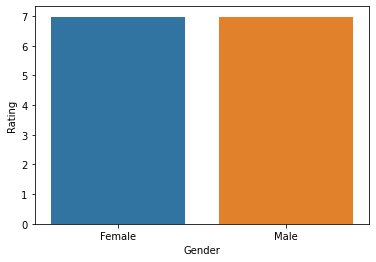

In [218]:
sns.barplot(x='Gender', y='Rating', data=market, ci=None)
plt.show('Fig.2 Male and Female Rating')
plt.show()

Average customer rating is 6.9661 out of 10.

In that average Rating from Female it is 
6.955311 and Male is 6.977126

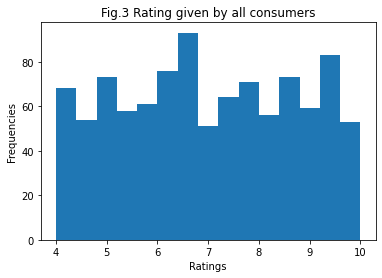

In [219]:
plt.hist(market['Rating'], bins=15)
plt.title('Fig.3 Rating given by all consumers')
plt.xlabel('Ratings')
plt.ylabel('Frequencies')
plt.show()

As we can infer from above graph the distribution of ratings given by consumers. Majority rating seems to be in the range of 6.5-7

3. What can you say about the aggregate sales across the branches? 


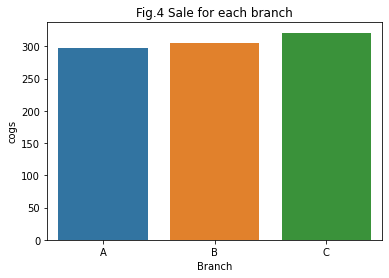

In [220]:
sns.barplot(x='Branch', y='cogs', data=market, ci=None)
plt.title('Fig.4 Sale for each branch') 
plt.show()
# creating barplot for each branch to understand the mean value of cost of goods sold

As we can see in Fig 3, branch C have the highest aggregate among the three followed by B and then A at last.

4. Which is the most popular payment method used by customers?


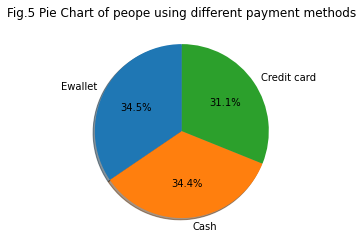

In [221]:
count=market['Payment'].value_counts()
AM=market['Payment'].unique()
plt.pie(count, labels = AM,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("Fig.5 Pie Chart of peope using different payment methods")
plt.show()

As we can see in Fig.5 that Ewallet is used by majority of people, from this we can conclude that Ewallet is the most popular method among people

5. Does gross income affect customer ratings? 


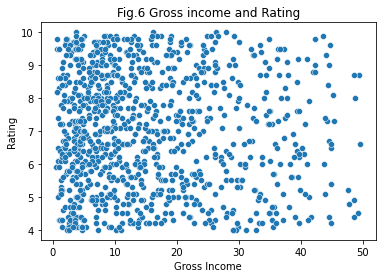

In [222]:
market.rename(columns={'gross income': 'gross_income'}, inplace=True) #renaming gross income column to 'gross_income' to use in next line of code
sns.scatterplot(x='gross_income', y='Rating', data=market) #plotting scatter plot
plt.title('Fig.6 Gross income and Rating')
plt.xlabel('Gross Income')
plt.show()

In fig.6 we can see that the gross income have no positive or negative effect on Rating

**bold text**
6. Which is the most profitable branch? 


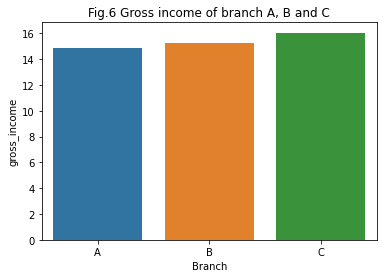

In [223]:
sns.barplot(x='Branch', y='gross_income', data=market, ci=None) #ploting barplot between Branch and corresponding grosss income
plt.title('Fig.6 Gross income of branch A, B and C')
plt.show()

We can infer from Fig.6 that branch C is the most profitable branch

7. Create a boxplot between Gender and Gross income and explain the results?


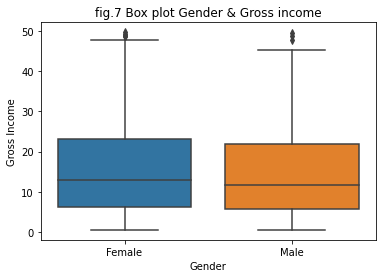

In [224]:
sns.boxplot(x='Gender',y='gross_income', data=market) #ploting boxplot between gender & gross income
plt.title("fig.7 Box plot Gender & Gross income")
plt.ylabel('Gross Income')
plt.show()

From the fig.7 it is clear that on an average gross income from Female is higher as compare to males, i.e. more females are purchanging from supermarket.



8. Can you see any time trend in gross income? 


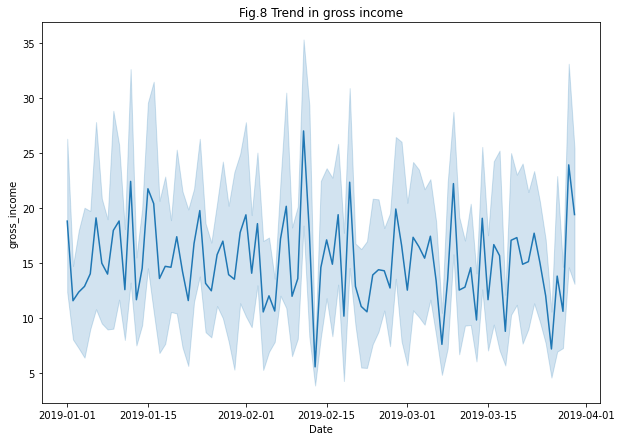

In [225]:
fig = plt.figure(figsize =(10, 7))
sns.lineplot(x='Date', y='gross_income', data=market) #plotting gross income trend
plt.title('Fig.8 Trend in gross income')
plt.show()

Just before 15th Feb 2019 the gross income of supercenter were highest showing that most people purchased some or the other stuff.

9. What is the spending pattern of both males and females, meaning in which category do they spend more? 


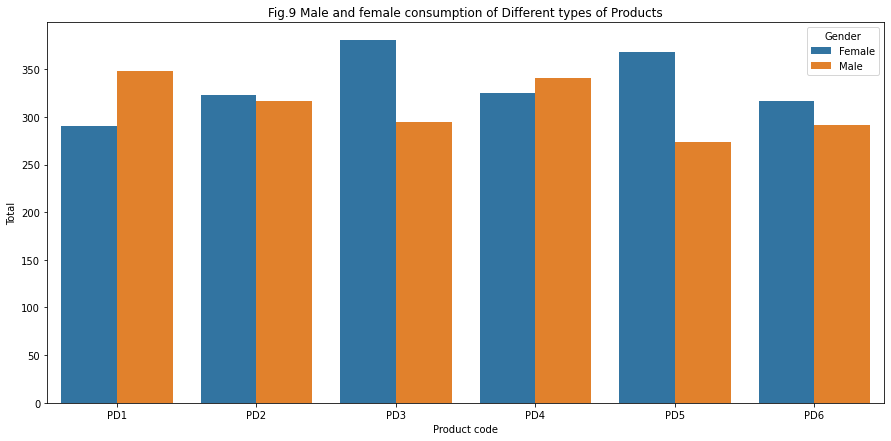

In [226]:
fig = plt.figure(figsize=(15,7))
sns.barplot(x='Product code', y='Total', hue='Gender', data=market,ci=None)
plt.title('Fig.9 Male and female consumption of Different types of Products')

plt.show()

Fig.9 Shows us clearly that the spenditure on different types of product by both male and female

10. How many products are bought by customers? 


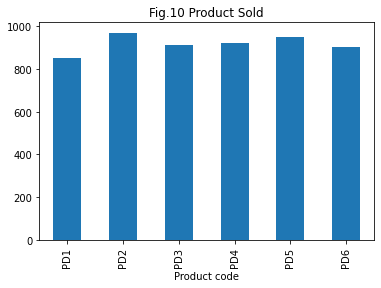

In [227]:
Product_bought=market.groupby('Product code').Quantity.sum()
Product_bought.plot(kind='bar')
plt.title('Fig.10 Product Sold')
plt.show()

Fig. 10 shows the product quantity purchased by the customer

11. Which day of the week has maximum sales? 


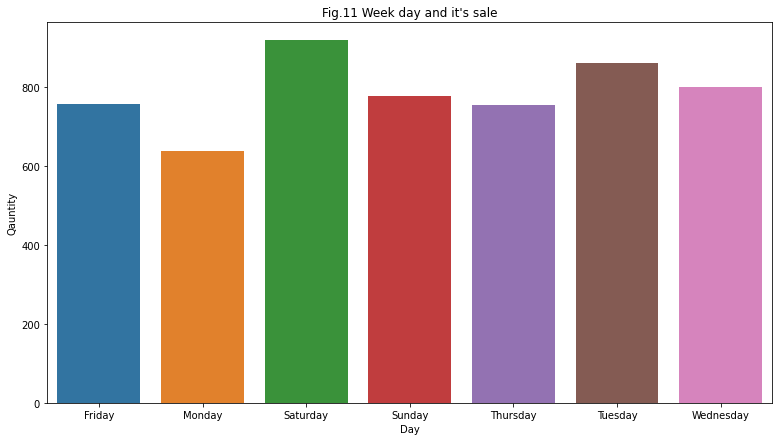

In [228]:
market['Day']=market['Date'].dt.day_name()   # creating new column Day for storing the day 
aggregate=market.groupby('Day')['Quantity'].sum() #aggregating Day corresponding to the sum of quantity sold
temp1=list(aggregate.index)
temp2=list(aggregate.values) 
plt.figure(figsize=(13,7))
sns.barplot(x=temp1, y=temp2, data=market)
plt.ylabel('Qauntity')
plt.xlabel('Day')
plt.title("Fig.11 Week day and it's sale")
plt.show()
#plt.plot(x,y,'r')

As we can observe from Fig.11 that the highest sales were on Saturday of more than 900 items

12. Which hour of the day is busiest? 


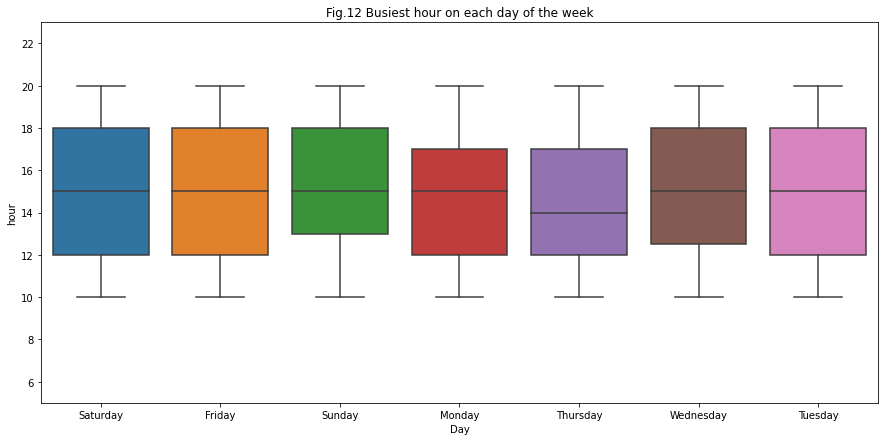

In [229]:
market['hour']=market['Time'].str[:2] # taking out only hour part from Time column
market['hour']=market['hour'].astype('int')
plt.figure(figsize=(15,7))
plt.ylim(5,23)
plt.title('Fig.12 Busiest hour on each day of the week')
plt.xlabel('Day')
plt.ylabel('Hour')
sns.boxplot(x='Day', y='hour', data=market)
plt.show()



Figure 12 displays clearly that from approx 12 pm to 6 pm is the busiest hours of the day all over the week

13. Which product line should your supermarket focus on? 


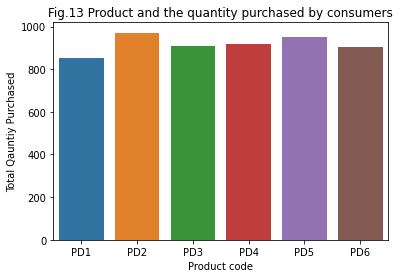

In [230]:
aggregate_ProductQantity=market.groupby('Product code')['Quantity'].sum() #aggregating product based on 
                                                                          #the total quantity bought by the users.
x=list(aggregate_ProductQantity.index)
y=list(aggregate_ProductQantity.values)
plt.xlabel('Product code')
plt.ylabel('Total Qauntiy Purchased')
plt.title('Fig.13 Product and the quantity purchased by consumers')
sns.barplot(x=x,y=y, data=market)
plt.show()

Fig.13 shows that the highest purchase was for product PD2 and the supermarket can focus more on that to fullfil the public demand

14. Which city should be chosen for expansion and what products should be focussed on?


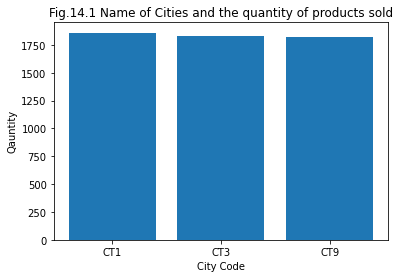

In [231]:
aggregate_city = market.groupby('city code ')['Quantity'].sum()
x=aggregate_city.index
y=aggregate_city.values
plt.xlabel("City Code")
plt.ylabel("Qauntity")
plt.title("Fig.14.1 Name of Cities and the quantity of products sold")
plt.bar(x,y)
plt.show()

Fig.14.1 shows that CT1 should be choosen for expansion as the demands of the products is highest there

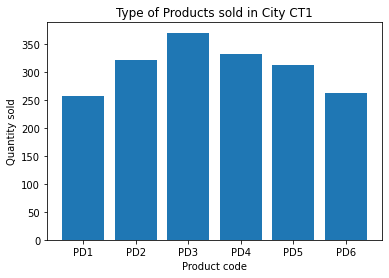

In [234]:
aggregate_city_products=market.loc[market['city code '] == 'CT1']
Important_product=aggregate_city_products.groupby('Product code')['Quantity'].sum()
x=Important_product.index
y=Important_product.values
plt.xlabel('Product code')
plt.ylabel('Quantity sold')
plt.title('Type of Products sold in City CT1')
plt.bar(x,y)
plt.show()

We can conclude from Fig.14.2 that in CT1 PD3 is in high demand.
Hence for expansion CT1 and product PD3 should be choosen